# Ensemble Method Implementation : Random Forest Classifier and Gradient Boost Classifier

In machine learning, ensemble methods are strategies that merge several independent models to produce a more potent and reliable model. The purpose of ensemble methods is to increase overall predictive performance by utilizing the diversity of the constituent models.
Here, two popular Ensemble methods are used for our Vehicle Motion Classification Problem:
1. Random Forest Classifier
2. Gradient Boost Classifier

## Preparing training and testing sets

In [210]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#Reading training dataset
df = pd.read_csv('data/training.csv')
df.head()

,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,straight,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,straight,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,rest,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,rest,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,straight,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [241]:
#Separating the feature matrix (X) and target vector (y)
y = df['motion_state'].copy()
X = df[[col for col in df.columns if col !='motion_state']].copy()
print("Feature matrix :")
print(X.head())
print("\n")
print("Target vector: ")
print(y.head())

Feature matrix :
    adt_sum   gdt_sum  axdt_var  aydt_var  azdt_var      gxdt_var  \
0  9.498792  0.008515  0.000004  0.000001  0.000006  3.856139e-09   
1  9.799902  0.008413  0.000004  0.000001  0.000007  3.463234e-09   
2  9.792245  0.009893  0.000004  0.000001  0.000007  3.881253e-09   
3  9.796759  0.009319  0.000004  0.000001  0.000008  3.439800e-09   
4  9.806574  0.009778  0.000003  0.000008  0.000006  5.623301e-09   

       gydt_var      gzdt_var   adt_var       gdt_var   adt_min   gdt_min  \
0  2.467973e-09  1.958251e-09  0.000006  1.076465e-09  0.093785  0.000026   
1  2.769963e-09  1.785013e-09  0.000006  1.299795e-09  0.094010  0.000015   
2  3.281482e-09  3.870479e-09  0.000007  1.794662e-09  0.093513  0.000010   
3  3.309496e-09  2.681825e-09  0.000008  1.547565e-09  0.093461  0.000017   
4  2.478434e-09  2.738851e-09  0.000006  1.621392e-09  0.093818  0.000032   

    adt_max   gdt_max  
0  0.101785  0.000171  
1  0.101634  0.000167  
2  0.101982  0.000219  
3  0.1023

In [242]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [243]:
#Splitting the training dataset into training and test segments for the ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Utilising GridSearchCV with a Pipeline 
#### (Reference )

GridSearchCv from the scikit-learn library performs a grid search and cross validation.

Grid Search : 
- systematically explores predefined hyperparameter values to find the optimal combination for a machine learning model.
- helps in tuning model parameters to improve performance metrics

Cross Validation :
- splits the dataset into multiple subsets and evaluating the model on each subset
- helps reduce the risk of overfitting and ensures better generalization

Therefore, GridSearchCV automates the process of hyperparameter tuning while ensuring a reliable estimate of the model's performance through cross-validation.

A Pipeline is a sequence of data processing steps combined into a single workflow, where the output of each step is the input to the next.

When combining GridSearchCV with a Pipeline, the general steps followed are as follows:
1. Define Pipeline
    - Pipelines are defined, comprising preprocessing transformers and a machine learning model.

2. Define Parameter Grid
    - Hyperparameter grids for the model in the pipeline are specified.

3. Instantiate GridSearchCV
    - GridSearchCV objects are instantiated, incorporating the pipeline and parameter grids, along with the desired number of cross-validation folds.

4. Fit GridSearchCV
    - GridSearchCV objects are fitted to the training data.

5. Get Best Estimator
    - Best estimators, representing the pipeline with optimal hyperparameters, are obtained from the GridSearchCV objects.

6. Print Results
    - Best parameters, training and validation scores are printed, and the best model may be evaluated on the test set if needed.

In [ ]:
# 1. Define Pipeline
pipe_RFC = Pipeline([('classifier',RandomForestClassifier())])

In [214]:
# 2. Define Parameter Grid
param_grid_RFC ={
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [2, 5, 10, 50],
        'classifier__max_depth': [ 2, 3, 5]
    }

In [216]:
grid_RFC = GridSearchCV(pipe_RFC, param_grid_RFC, cv=5, return_train_score=True)
grid_RFC.fit(X_train, y_train)
RFC_best_estimator = grid_RFC.best_estimator_

In [217]:
print("Random Forest Classifier :")
print("Best parameters:\n{}\n".format(grid_RFC.best_params_))
print("Best CV train score: {:.2f}".format(grid_RFC.cv_results_['mean_train_score'][grid_RFC.best_index_]))
print("Best CV validation score: {:.2f}".format(grid_RFC.best_score_))
print("Test set score: {:.2f}".format(grid_RFC.score(X_test, y_test)))

Random Forest Classifier :
Best parameters:
{'classifier': RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42), 'classifier__max_depth': 3, 'classifier__n_estimators': 10}

Best CV train score: 0.93
Best CV validation score: 0.88
Test set score: 0.86


In [ ]:
pipe_GBC = Pipeline([('classifier',GradientBoostingClassifier())])

In [ ]:
param_grid_GBC={
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [2, 5, 10, 50],
        'classifier__max_depth': [ 2, 3, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
    }

In [219]:
grid_GBC = GridSearchCV(pipe_GBC, param_grid_GBC, cv=5, return_train_score=True)
grid_GBC.fit(X_train, y_train)
GBC_best_estimator = grid_GBC.best_estimator_

In [220]:
print("Gradient Boost Classifier :")
print("Best params:\n{}\n".format(grid_GBC.best_params_))
print("Best cross-validation train score: {:.6f}".format(grid_GBC.cv_results_['mean_train_score'][grid_GBC.best_index_]))
print("Best cross-validation validation score: {:.6f}".format(grid_GBC.best_score_))
print("Test-set score: {:.6f}".format(grid_GBC.score(X_test, y_test)))

Gradient Boost Classifier :
Best params:
{'classifier': GradientBoostingClassifier(learning_rate=0.5, n_estimators=2, random_state=42), 'classifier__learning_rate': 0.5, 'classifier__max_depth': 3, 'classifier__n_estimators': 2}

Best cross-validation train score: 0.977893
Best cross-validation validation score: 0.862162
Test-set score: 0.871795


In [221]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')


    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)

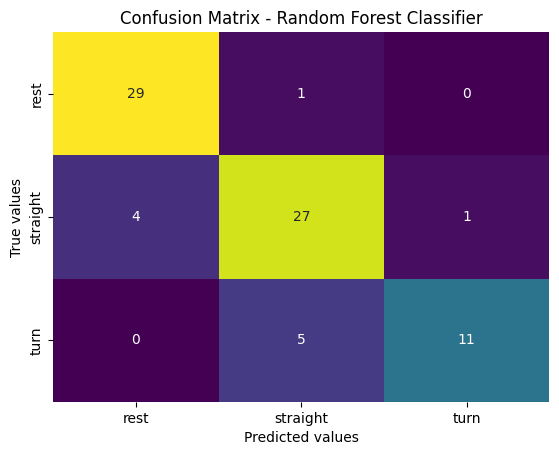


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.88      0.97      0.92        30
    straight       0.82      0.84      0.83        32
        turn       0.92      0.69      0.79        16

    accuracy                           0.86        78
   macro avg       0.87      0.83      0.85        78
weighted avg       0.86      0.86      0.86        78


Accuracy Score: 0.8589743589743589
Precision Score: 0.8712121212121212
Recall Score: 0.8326388888888889
F1 Score: 0.8457061457061457


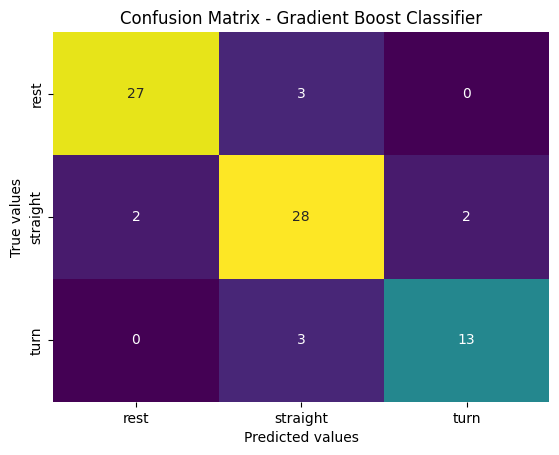


Classification Report for Gradient Boost Classifier:
              precision    recall  f1-score   support

        rest       0.93      0.90      0.92        30
    straight       0.82      0.88      0.85        32
        turn       0.87      0.81      0.84        16

    accuracy                           0.87        78
   macro avg       0.87      0.86      0.87        78
weighted avg       0.87      0.87      0.87        78


Accuracy Score: 0.8717948717948718
Precision Score: 0.8737435203966645
Recall Score: 0.8624999999999999
F1 Score: 0.867482921064113
Test-set score RFC: 0.858974
Test-set score GBC: 0.871795


In [222]:
# Original Dataset results
evaluate_classification(y_test, RFC_best_estimator.predict(X_test), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
evaluate_classification(y_test, GBC_best_estimator.predict(X_test), ['rest', 'straight', 'turn'], 'Gradient Boost Classifier')

print("Test-set score RFC: {:.6f}".format(RFC_best_estimator.score(X_test, y_test)))
print("Test-set score GBC: {:.6f}".format(GBC_best_estimator.score(X_test, y_test)))

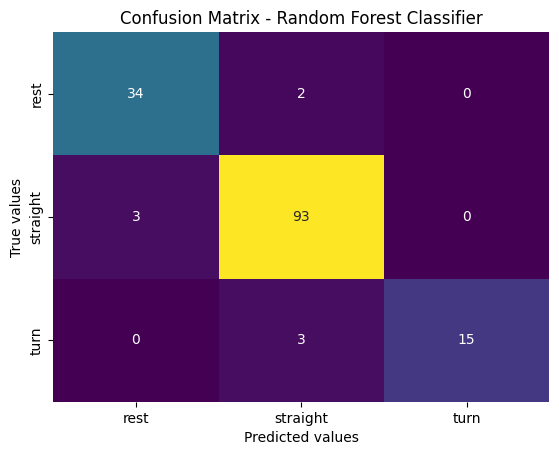


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.92      0.94      0.93        36
    straight       0.95      0.97      0.96        96
        turn       1.00      0.83      0.91        18

    accuracy                           0.95       150
   macro avg       0.96      0.92      0.93       150
weighted avg       0.95      0.95      0.95       150


Accuracy Score: 0.9466666666666667
Precision Score: 0.9559661702518846
Recall Score: 0.9155092592592592
F1 Score: 0.9331202150013053


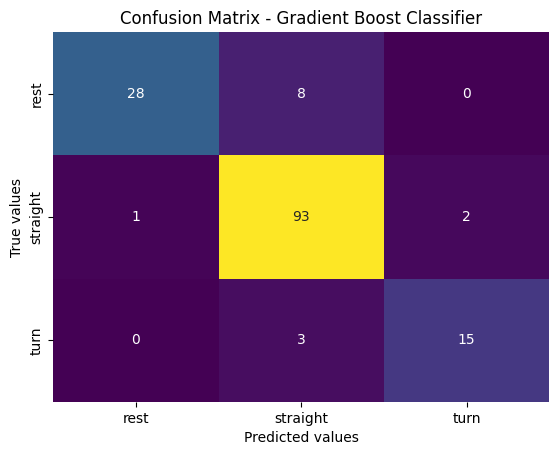


Classification Report for Gradient Boost Classifier:
              precision    recall  f1-score   support

        rest       0.97      0.78      0.86        36
    straight       0.89      0.97      0.93        96
        turn       0.88      0.83      0.86        18

    accuracy                           0.91       150
   macro avg       0.91      0.86      0.88       150
weighted avg       0.91      0.91      0.90       150


Accuracy Score: 0.9066666666666666
Precision Score: 0.9140336505955168
Recall Score: 0.8599537037037037
F1 Score: 0.8828937728937728
Test-set score RFC: 0.946667
Test-set score GBC: 0.906667


In [223]:
df2 = pd.read_csv('data/testing.csv')
y2 = df2['motion_state'].copy()
X2 = df2[[col for col in df2.columns if col !='motion_state']].copy()

#Dataset 2 results
evaluate_classification(y2, RFC_best_estimator.predict(X2), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
evaluate_classification(y2, GBC_best_estimator.predict(X2), ['rest', 'straight', 'turn'], 'Gradient Boost Classifier')

print("Test-set score RFC: {:.6f}".format(RFC_best_estimator.score(X2, y2)))
print("Test-set score GBC: {:.6f}".format(GBC_best_estimator.score(X2, y2)))

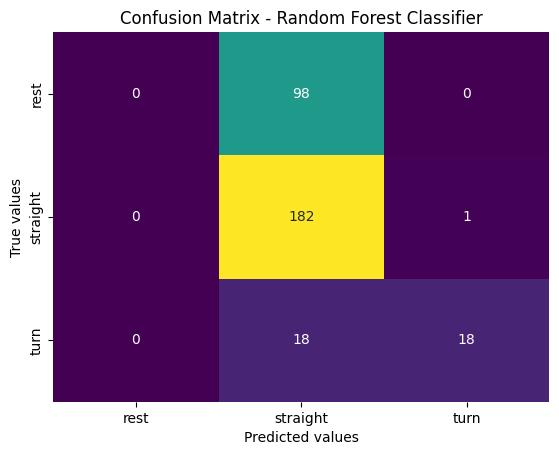


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        98
    straight       0.61      0.99      0.76       183
        turn       0.95      0.50      0.65        36

    accuracy                           0.63       317
   macro avg       0.52      0.50      0.47       317
weighted avg       0.46      0.63      0.51       317


Accuracy Score: 0.6309148264984227
Precision Score: 0.5193688920287295
Recall Score: 0.4981785063752277
F1 Score: 0.47043407043407043


c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\an

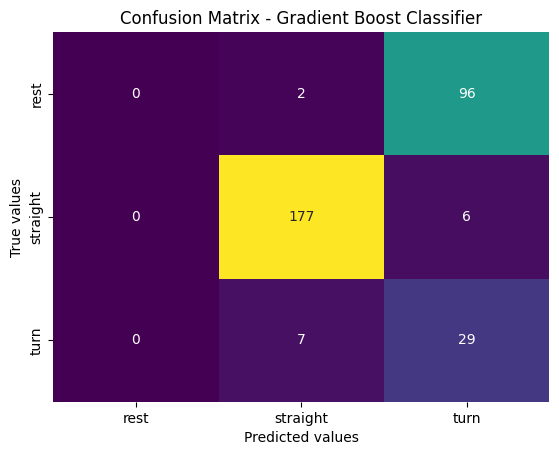


Classification Report for Gradient Boost Classifier:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        98
    straight       0.95      0.97      0.96       183
        turn       0.22      0.81      0.35        36

    accuracy                           0.65       317
   macro avg       0.39      0.59      0.44       317
weighted avg       0.57      0.65      0.59       317


Accuracy Score: 0.6498422712933754
Precision Score: 0.39099564967577777
Recall Score: 0.590922890103218
F1 Score: 0.4355516609058306
Test-set score RFC: 0.630915
Test-set score GBC: 0.649842


c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\anaconda3\envs\proj682_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anany\an

In [228]:
df3 = pd.read_csv('data/testing2.csv')
y3 = df3['motion_state'].copy()
X3 = df3[[col for col in df3.columns if col !='motion_state']].copy()

#Dataset 3 results
evaluate_classification(y3, RFC_best_estimator.predict(X3), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
evaluate_classification(y3, GBC_best_estimator.predict(X3), ['rest', 'straight', 'turn'], 'Gradient Boost Classifier')

print("Test-set score RFC: {:.6f}".format(RFC_best_estimator.score(X3, y3)))
print("Test-set score GBC: {:.6f}".format(GBC_best_estimator.score(X3, y3)))


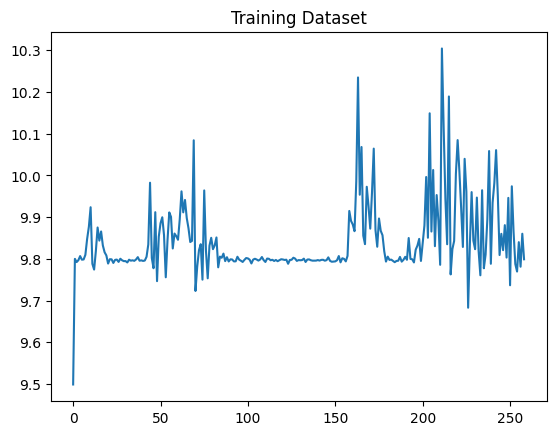

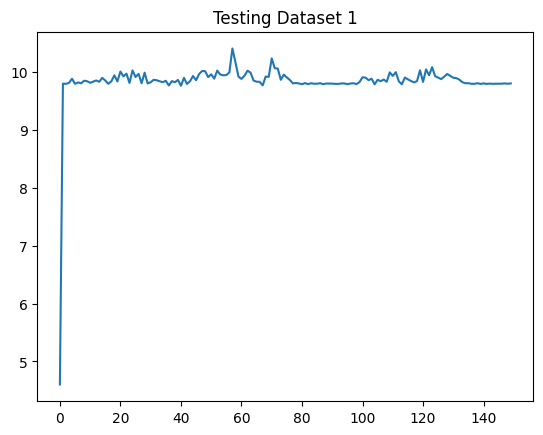

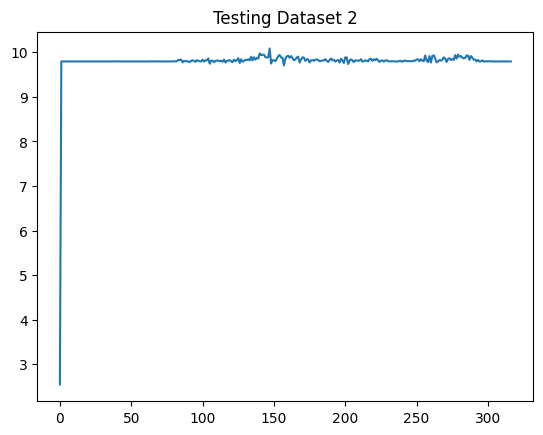

In [229]:
plt.plot(df['adt_sum'])
plt.title('Training Dataset')
plt.show()

plt.plot(df2['adt_sum'])
plt.title('Testing Dataset 1')
plt.show()

plt.plot(df3['adt_sum'])
plt.title('Testing Dataset 2')
plt.show()

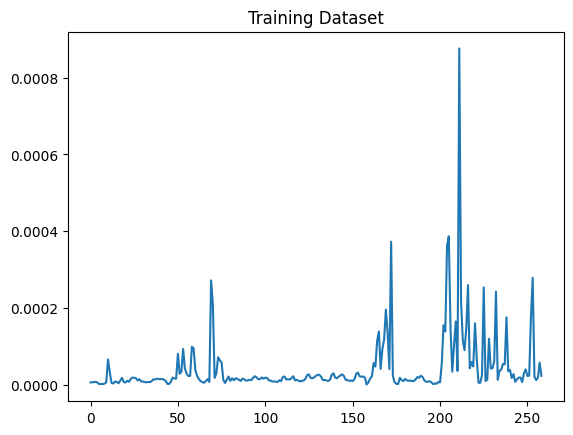

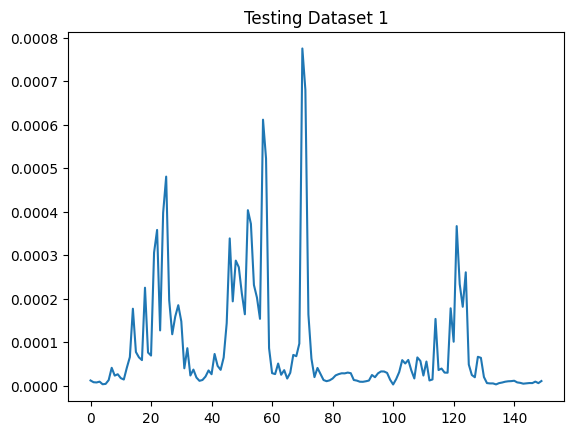

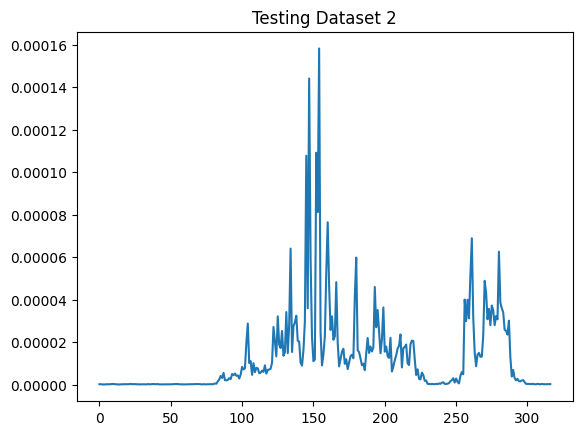

In [230]:
plt.plot(df['adt_var'])
plt.title('Training Dataset')
plt.show()

plt.plot(df2['adt_var'])
plt.title('Testing Dataset 1')
plt.show()

plt.plot(df3['adt_var'])
plt.title('Testing Dataset 2')
plt.show()

In [231]:
print("Number of samples in X3:", X3.shape)
print("Number of samples in y3:", y3.shape[0])

Number of samples in X3: (317, 14)
Number of samples in y3: 317


In [232]:
'''X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3, random_state=42)

param_grid_RFC ={
        'classifier': [RandomForestClassifier(random_state=42)],
        'classifier__n_estimators': [2,5, 10, 50],
        'classifier__max_depth': [ 2, 3, 5]
    }

param_grid_GBC={
        'classifier': [GradientBoostingClassifier(random_state=42)],
        'classifier__n_estimators': [2, 5, 10, 50],
        'classifier__max_depth': [ 2, 3, 5],
        'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
    }

pipe_RFC3 = Pipeline([('classifier',RandomForestClassifier())])
pipe_GBC3 = Pipeline([('classifier',GradientBoostingClassifier())])'''

"X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3, random_state=42)\n\nparam_grid_RFC ={\n        'classifier': [RandomForestClassifier(random_state=42)],\n        'classifier__n_estimators': [2,5, 10, 50],\n        'classifier__max_depth': [ 2, 3, 5]\n    }\n\nparam_grid_GBC={\n        'classifier': [GradientBoostingClassifier(random_state=42)],\n        'classifier__n_estimators': [2, 5, 10, 50],\n        'classifier__max_depth': [ 2, 3, 5],\n        'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]\n    }\n\npipe_RFC3 = Pipeline([('classifier',RandomForestClassifier())])\npipe_GBC3 = Pipeline([('classifier',GradientBoostingClassifier())])"

In [233]:
'''grid_RFC3 = GridSearchCV(pipe_RFC3, param_grid_RFC, cv=5, return_train_score=True)
grid_RFC3.fit(X_train3, y_train3)
RFC_best_estimator3 = grid_RFC3.best_estimator_'''

'grid_RFC3 = GridSearchCV(pipe_RFC3, param_grid_RFC, cv=5, return_train_score=True)\ngrid_RFC3.fit(X_train3, y_train3)\nRFC_best_estimator3 = grid_RFC3.best_estimator_'

In [234]:
'''grid_GBC3 = GridSearchCV(pipe_GBC3, param_grid_GBC, cv=5, return_train_score=True)
grid_GBC3.fit(X_train3, y_train3)
GBC_best_estimator3 = grid_GBC3.best_estimator_'''

'grid_GBC3 = GridSearchCV(pipe_GBC3, param_grid_GBC, cv=5, return_train_score=True)\ngrid_GBC3.fit(X_train3, y_train3)\nGBC_best_estimator3 = grid_GBC3.best_estimator_'

In [235]:
'''print("Test-set score RFC: {:.6f}".format(RFC_best_estimator3.score(X_test3, y_test3)))
print("Test-set score GBC: {:.6f}".format(GBC_best_estimator3.score(X_test3, y_test3)))'''

'print("Test-set score RFC: {:.6f}".format(RFC_best_estimator3.score(X_test3, y_test3)))\nprint("Test-set score GBC: {:.6f}".format(GBC_best_estimator3.score(X_test3, y_test3)))'

In [236]:
'''evaluate_classification(y_test3, RFC_best_estimator3.predict(X_test3), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
evaluate_classification(y_test3, GBC_best_estimator3.predict(X_test3), ['rest', 'straight', 'turn'], 'Gradient Boost Classifier')'''

"evaluate_classification(y_test3, RFC_best_estimator3.predict(X_test3), ['rest', 'straight', 'turn'], 'Random Forest Classifier')\nevaluate_classification(y_test3, GBC_best_estimator3.predict(X_test3), ['rest', 'straight', 'turn'], 'Gradient Boost Classifier')"

In [237]:
'''evaluate_classification(y3, RFC_best_estimator3.predict(X3), ['rest', 'straight', 'turn'], 'Random Forest Classifier')
evaluate_classification(y3, GBC_best_estimator3.predict(X3), ['rest', 'straight', 'turn'], 'Gradient Boost Classifier')

print("Test-set score RFC: {:.6f}".format(RFC_best_estimator3.score(X3, y3)))
print("Test-set score GBC: {:.6f}".format(GBC_best_estimator3.score(X3, y3)))'''

'evaluate_classification(y3, RFC_best_estimator3.predict(X3), [\'rest\', \'straight\', \'turn\'], \'Random Forest Classifier\')\nevaluate_classification(y3, GBC_best_estimator3.predict(X3), [\'rest\', \'straight\', \'turn\'], \'Gradient Boost Classifier\')\n\nprint("Test-set score RFC: {:.6f}".format(RFC_best_estimator3.score(X3, y3)))\nprint("Test-set score GBC: {:.6f}".format(GBC_best_estimator3.score(X3, y3)))'